# Thay SPSS bằng R

Xét về ngôn ngữ lập trình, so với Python thì R gần gũi hơn với các nhà thống kê, do đó chúng ta sẽ bắt đầu bằng việc chuyển từ SPSS sang R

Page này sử dụng code R để thực hiện các lệnh thường dùng trên SPSS, cụ thể là hướng dẫn cách mở và đọc file SPSS, thực hiện tóm tắt cho các biến đơn biến và hai biến, sau đó đi sâu vào các chủ đề như phân tích nhân tố, phân tích thành phần chính (PCA), phân tích phân biệt, hồi quy và phân cụm.


## General setup


In [ ]:
# Import libraries and suppress messages and warnings
suppressMessages({
  library(haven)
  library(knitr)
  library(kableExtra)
  library(sjPlot)
  library(tidyverse)
  library(sjlabelled)
  library(janitor) # for frequency summary
  library(dplyr)
  library(tables)
  library(pivottabler)
  library(ggplot2)
  library(RColorBrewer)
  library(vcdExtra)
  library(stargazer)
  library(DescTools)
  library(labelled)
  library(psych)
  library(conflicted) # Load conflicted package for conflict management
})

In [2]:
# digit
options(digits = 3)

# ggplot
theme_set(theme_classic())
update_geom_defaults("bar", list(fill = 'steelblue'))
theme_update(
    text = element_text(size = 16) # Adjust the size as needed
)

# Set default theme and color palette
options(
    ggplot2.continuous.colour = function() scale_color_viridis_c(),
    ggplot2.continuous.fill = function() scale_fill_viridis_c(),
    ggplot2.discrete.colour = function() scale_color_brewer(palette = "Paired"),
    ggplot2.discrete.fill = function() scale_fill_brewer(palette = "Paired"),
    kable.format = "pandoc",
    par.bg = "white"
)



### function

In [3]:
# function to get label of a variable or multiple variables
u_get_label <- function(data, var){
  if(length(var) == 1){
    return(attr(data[[var]], 'label'))
  } else {
    return(sapply(var, function(x) attr(data[[x]], 'label')))
  }
}
# show and format table
u_show_table <- function(dat, font_size = 15) {
  dat %>%
    kbl(table.attr = "style='width:auto; display:inline-block;'") %>%
    kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                  font_size = font_size, full_width = FALSE)
}

## Import and process data

### import data

In [4]:
# Load the dataset
dat_online <- read_sav("/Users/macbook/Library/CloudStorage/GoogleDrive-tranquangthanhcong@gmail.com/My Drive/study/ueh master/multivariate/data/MUASONLINE.sav")
head(dat_online,2)

TT1,TT2,TT3,HH1,HH2,HH3,DV1,DV2,DV3,DV4,...,Nghe,Thu_nhap,Hoc_van,ctieums,X1,X3,Y,X2,CD_DH,chitieuMH
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,...,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>
5,5,5,2,4,4,5,5,5,5,...,1,3,2,0.5,5.0,3.33,4.92,5,1,1
4,4,4,4,4,4,3,3,3,4,...,1,2,2,1.0,3.4,4.00,3.80,4,1,2


In [5]:
# convert value to factors (readable)
dat_fact_online <- as_label(dat_online) %>% as_factor()
head(dat_fact_online,2)

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m [90m[conflicted][39m [1mas_factor[22m found in 2 packages.
Either pick the one you want with `::`:
[36m*[39m [34msjlabelled[39m::as_factor
[36m*[39m [34mforcats[39m::as_factor
Or declare a preference with `conflicts_prefer()`:
[36m*[39m `conflicts_prefer(sjlabelled::as_factor)`
[36m*[39m `conflicts_prefer(forcats::as_factor)`


In [6]:
# view dictionary of variables
map(names(dat_online), ~ setNames(u_get_label(dat_online, .x), .x))


[[1]]
                                                                  TT1 
"mua hang truc tuyen hoat dong 24h nen co the mua vao bat cu luc nao" 

[[2]]
                                           TT2 
"mua hang truc tuyen giup tiet kiem thoi gian" 

[[3]]
                                  TT3 
"cach thuc mua va thanh toan de dang" 

[[4]]
                                      HH1 
"san pham phu hop voi so tien ma toi tra" 

[[5]]
                 HH2 
"san pham phong phu" 

[[6]]
                                                          HH3 
"san pham dam bao chat luong nhu thong tin cung cap tren web" 

[[7]]
                                                DV1 
"nhan vien vui ve giai dap thac mac cua khach hang" 

[[8]]
                                       DV2 
"nhan vien luon ho tro khi khach hang can" 

[[9]]
                                         DV3 
"nhan vien luon giup do khach hang tan tinh" 

[[10]]
                                            DV4 
"khi mua sam online hang hoa duoc giao tan noi" 

[[11]]
                               DV5 
"hang hoa duoc giao dung thoi han" 

[[12]]
                                                                           HL1 
"nhung nguoi xung quanh toi cung co nhung nhan xet tich cuc ve mua sam online" 

[[13]]
                                                                                             HL2 
"nhung nhan xet tich cuc tren cac dien dan truc tuyen anh huong den quyet dinh mua hang cua toi" 

[[14]]
                                                                           HL3 
"toi se gioi thieu nguoi quen nen mua sam truc tuyen vi nhung tien ich cua no" 

[[15]]
        GT1 
"gioi tinh" 

[[16]]
  Tuoi 
"tuoi" 

[[17]]
         Nghe 
"nghe nghiep" 

[[18]]
  Thu_nhap 
"thu nhap" 

[[19]]
  Hoc_van 
"hoc van" 

[[20]]
                             ctieums 
"chi tieu mua sam online hang thang" 

[[21]]
             X1 
"dv khach hang" 

[[22]]
        X3 
"hang hoa" 

[[23]]
                        Y 
"hai long mua sam online" 

[[24]]
          X2 
"thuan tien" 

[[25]]
             CD_DH 
"cao dang-dai hoc" 

[[26]]
        chitieuMH 
"chi tieu ma hoa"

Vậy là chúng ta đã tải dữ liệu .sav thành công và sẵn sàng cho bước tiếp theo.

## Summary

Trong phần này, chúng ta sẽ sử dụng R để xem tóm tắt về dữ liệu và thực hiện một số phân tích mô tả.

### Group and report in table

**1 dimension**

In [28]:
dat_fact_online %>% tabyl('TT1')  %>%
    adorn_pct_formatting()

TT1,n,percent
<fct>,<dbl>,<chr>
Hoan toan khong dong y,0,0.0%
Khong dong y,0,0.0%
Khong co y kien,5,1.9%
Dong y,151,58.8%
Hoan toan dong y,101,39.3%


In [35]:
dat_fact_online %>% tabyl('Hoc_van')  %>%
    adorn_pct_formatting()

Hoc_van,n,percent
<fct>,<dbl>,<chr>
pho thong trung hoc,102,39.7%
cao dang-dai hoc,139,54.1%
tren dai hoc,16,6.2%


**2 dimension**

In [36]:
table(dat_fact_online$Thu_nhap, dat_fact_online$Hoc_van)

            
             pho thong trung hoc cao dang-dai hoc tren dai hoc
  duoi 10                     29               11            0
  10-14                       42               55           10
  15 tro len                  31               73            6

**3 dimension**

In [52]:
ftable(dat_fact_online$GT1, dat_fact_online$Hoc_van, dat_fact_online$Thu_nhap)

                         duoi 10 10-14 15 tro len
                                                 
Nam pho thong trung hoc        4     7          6
    cao dang-dai hoc           0     7         11
    tren dai hoc               0     2          1
Nu  pho thong trung hoc       25    35         25
    cao dang-dai hoc          11    48         62
    tren dai hoc               0     8          5

### Correlation

In [164]:
head(dat_fact_online,2)

TT1,TT2,TT3,HH1,HH2,HH3,DV1,DV2,DV3,DV4,...,Nghe,Thu_nhap,Hoc_van,ctieums,X1,X3,Y,X2,CD_DH,chitieuMH
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Hoan toan dong y,Hoan toan dong y,Hoan toan dong y,Khong dong y,Dong y,Dong y,Hoan toan dong y,Hoan toan dong y,Hoan toan dong y,Hoan toan dong y,...,Van phong,15 tro len,cao dang-dai hoc,0.5,5,3.33333333333333,4.91666666666667,5,cao dang-dai hoc,0.0-0.9
Dong y,Dong y,Dong y,Dong y,Dong y,Dong y,Khong co y kien,Khong co y kien,Khong co y kien,Dong y,...,Van phong,10-14,cao dang-dai hoc,1,3.4,4,3.8,4,cao dang-dai hoc,1.0-1.9


In [172]:
dat_online %>% select(X1, X2, X3, Y) %>% cor() %>% kable(format = 'pandoc', digits = 2)



        X1     X2     X3      Y
---  -----  -----  -----  -----
X1    1.00   0.37   0.04   0.89
X2    0.37   1.00   0.03   0.63
X3    0.04   0.03   1.00   0.01
Y     0.89   0.63   0.01   1.00

### Plot

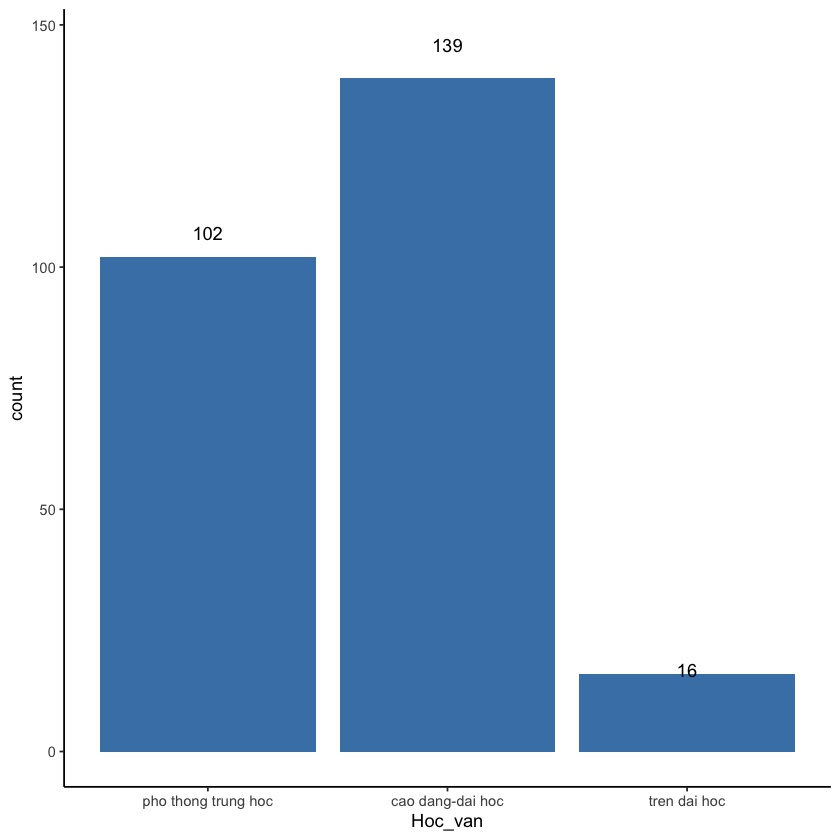

In [238]:
# frequency bar chart
ggplot(dat_fact_online, aes(x = Hoc_van)) + 
  geom_bar() + 
  geom_text(aes(label = ..count..), stat = "count", position = position_stack(v=1.05)) +
  theme_classic() # Adjust global text size

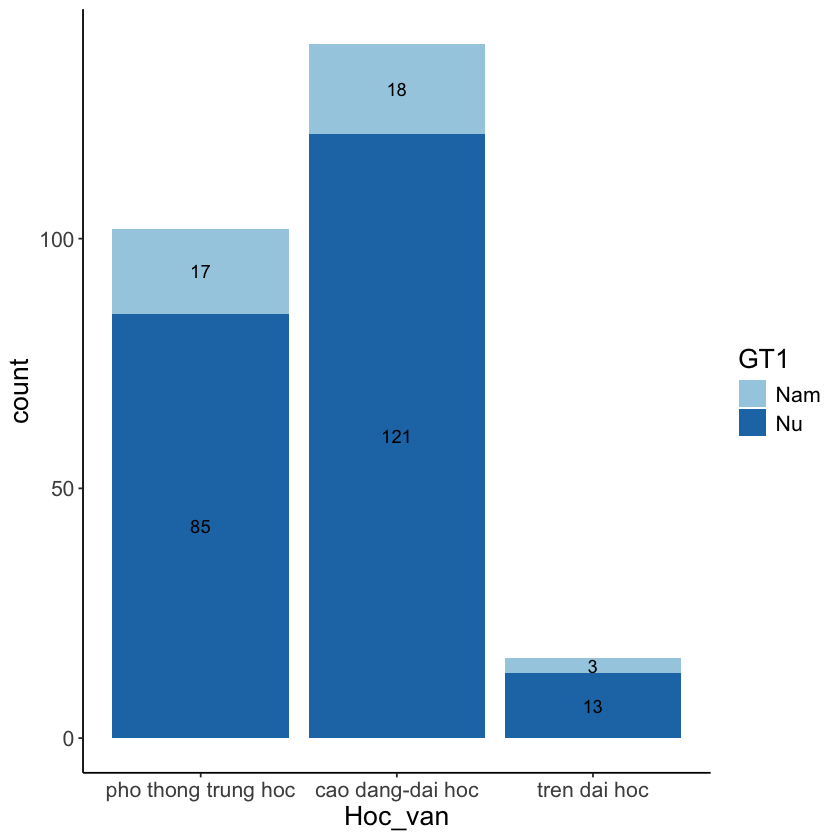

In [197]:
# stacked bar chart
ggplot(dat_fact_online, aes(x = Hoc_van,fill=GT1)) + 
  geom_bar() + geom_text(aes(label = ..count..), stat = "count", position = position_stack(vjust = 0.5))

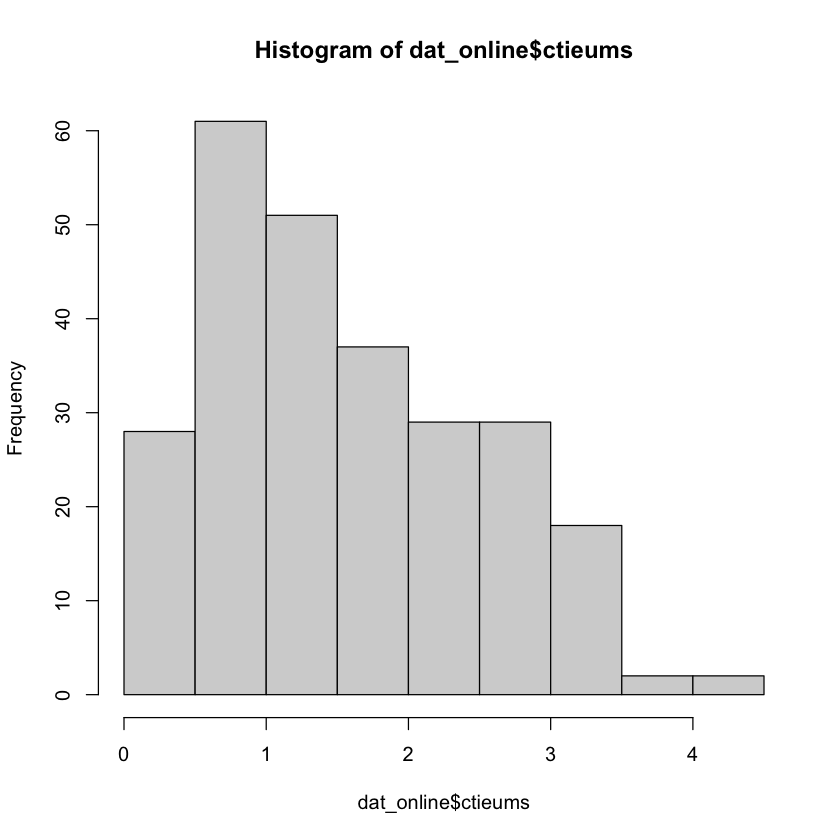

In [87]:
# histogram
hist(dat_online$ctieums)

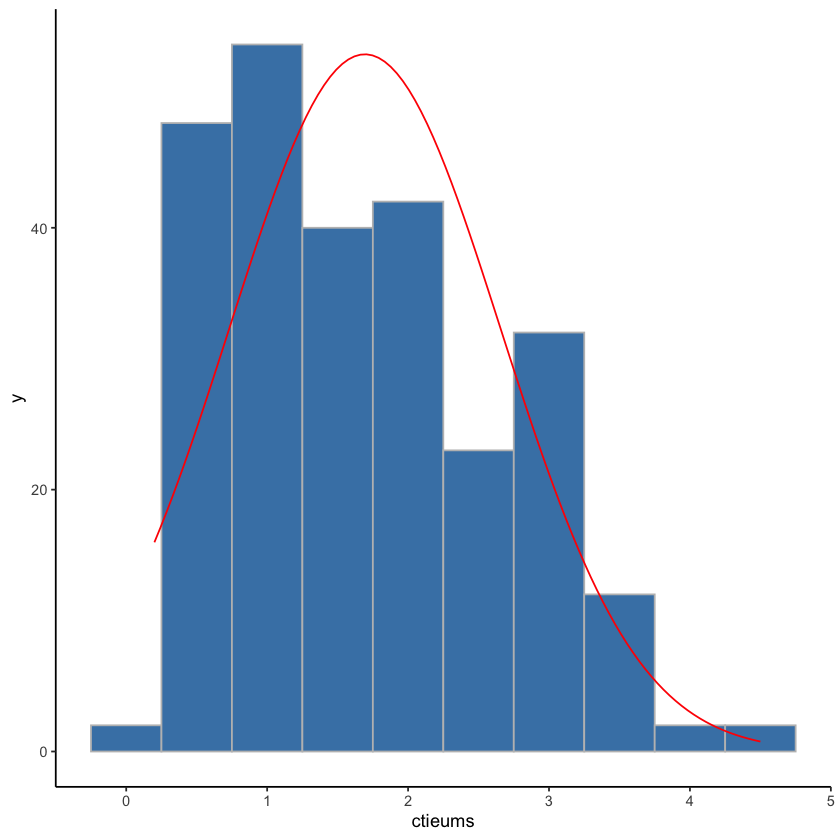

In [62]:
# histogram by ggplot2
ggplot(dat_online, aes(x = ctieums)) + 
  geom_histogram(binwidth = 0.5, color='gray') +
  stat_function(fun = function(x) dnorm(x, mean = mean(dat_online$ctieums), sd = sd(dat_online$ctieums)) * length(dat_online$ctieums) * 0.5, color = "red") +
  theme_classic()

In [ ]:
# digit
options(digits = 3)

# ggplot
theme_set(theme_classic())
update_geom_defaults("bar", list(fill = 'steelblue'))

# Set default theme and color palette
options(
    ggplot2.continuous.colour = function() scale_color_viridis_c(),
    ggplot2.continuous.fill = function() scale_fill_viridis_c(),
    ggplot2.discrete.colour = function() scale_color_brewer(palette = "Paired"),
    ggplot2.discrete.fill = function() scale_fill_brewer(palette = "Paired")
)

# Set default background color for plots
par(bg = "white")

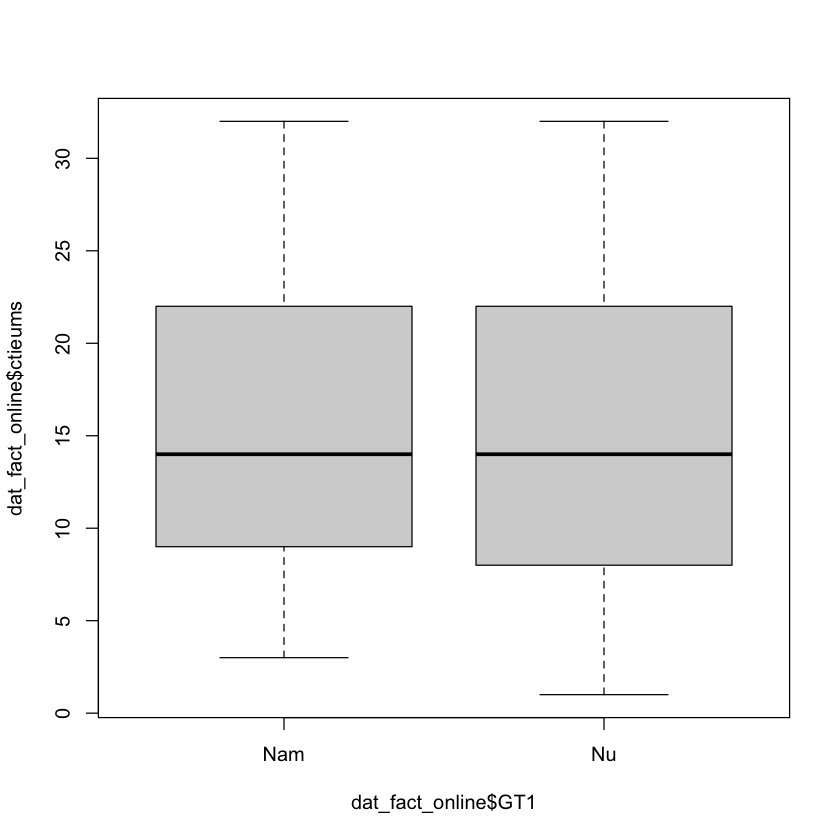

In [86]:
# boxplot
par(bg='white')
boxplot(dat_fact_online$ctieums ~ dat_fact_online$GT1)

## Hypothesis testing

### Bivariate (association)

#### chi-square test

In [116]:
# Crosstabs
table <- table(dat_fact_online$Hoc_van, dat_fact_online$Thu_nhap)

# Chi-square test
chisq_test <- chisq.test(table, simulate.p.value = TRUE)

# Phi and Cramer's V
phi <- sqrt(chisq_test$statistic / sum(table))
cramers_v <- sqrt(chisq_test$statistic / (sum(table) * (min(dim(table)) - 1)))

# Display results
cat('Table:')
print(table)
print(chisq_test, digits = 10)
cat('phi =', phi,'\n')
cat('cramers_v =', cramers_v)

Table:                     
                      duoi 10 10-14 15 tro len
  pho thong trung hoc      29    42         31
  cao dang-dai hoc         11    55         73
  tren dai hoc              0    10          6

	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  table
X-squared = 27.229364, df = NA, p-value = 0.0004997501

phi = 0.326 
cramers_v = 0.23

In [114]:
# Gamma
gamma_result <- GoodmanKruskalGamma(dat_fact_online$Hoc_van, dat_fact_online$Thu_nhap)
cat('gamma:', gamma_result)

gamma: 0.386

In [113]:
# Kendall's tau
kendall_result <- cor(dat_online$Hoc_van, dat_online$Thu_nhap, method = "kendall")
cat('\nkendall:', kendall_result)


kendall: 0.232

#### t-test

In [119]:
# t-test
t_test <- t.test(dat_online$ctieums ~ dat_online$GT1)
print.listof(t_test)

statistic :
    t 
0.122 

parameter :
  df 
53.1 

p.value :
[1] 0.903

conf.int :
[1] -0.303  0.342
attr(,"conf.level")
[1] 0.95

estimate :
mean in group 1 mean in group 2 
           1.71            1.69 

null.value :
difference in means between group 1 and group 2 
                                              0 

stderr :
[1] 0.161

alternative :
[1] "two.sided"

method :
[1] "Welch Two Sample t-test"

data.name :
[1] "dat_online$ctieums by dat_online$GT1"



#### quali vs quali

In [120]:
pearson_test <- cor.test(dat_online$ctieums, dat_online$X1, method = "pearson")
print.listof(pearson_test)

statistic :
   t 
1.11 

parameter :
 df 
255 

p.value :
[1] 0.267

estimate :
   cor 
0.0696 

null.value :
correlation 
          0 

alternative :
[1] "two.sided"

method :
[1] "Pearson's product-moment correlation"

data.name :
[1] "dat_online$ctieums and dat_online$X1"

conf.int :
[1] -0.0533  0.1903
attr(,"conf.level")
[1] 0.95



#### anova

In [123]:
# One-way ANOVA
anova_result <- aov(ctieums ~ Hoc_van, data = dat_online)

# Summary of the ANOVA
summary(anova_result)

             Df Sum Sq Mean Sq F value Pr(>F)
Hoc_van       1    2.3   2.281    2.48   0.12
Residuals   255  235.0   0.921               

In [124]:
# Welch's ANOVA
welch_anova <- oneway.test(ctieums ~ Hoc_van, data = dat_online, var.equal = FALSE)

# Display results
print(welch_anova)


	One-way analysis of means (not assuming equal variances)

data:  ctieums and Hoc_van
F = 2, num df = 2, denom df = 43, p-value = 0.2



## Factor analysis

### Cronbach Alpha
Cronbach's Alpha là một thước đo độ tin cậy nội tại, đánh giá mức độ liên quan chặt chẽ của một tập hợp các mục như một nhóm. Nó thường được sử dụng để đánh giá độ tin cậy của một thang đo hoặc bảng câu hỏi. Giá trị Cronbach's Alpha cao hơn (thường trên 0.7) cho thấy độ tin cậy tốt hơn. Trong bước tiếp theo, chúng ta sẽ tính Cronbach's Alpha cho các biến được chọn trong tập dữ liệu của chúng ta.


In [16]:
# cronbach alpha: to evaluate variable
items <- dat_online[, c("TT1", "TT2", "TT3")]
labels <- var_label(dat_online)
alpha_results <- psych::alpha(items)
kable(alpha_results$total,booktabs=T,format='pandoc')



      raw_alpha   std.alpha   G6(smc)   average_r    S/N    ase   mean      sd   median_r
---  ----------  ----------  --------  ----------  -----  -----  -----  ------  ---------
          0.908       0.908     0.877       0.767   9.89   0.01    4.4   0.486      0.737

Độ tin cậy của thang đo cao, với Cronbach's Alpha là 0.908, cho thấy sự nhất quán nội tại mạnh mẽ. Tương quan trung bình giữa các mục là 0.767, phản ánh mối quan hệ chặt chẽ giữa các mục. Ngoài ra, chất lượng đo lường đáng tin cậy, với tỷ lệ tín hiệu trên nhiễu (S/N) là 9.89.

Để đánh giá tác động của từng mục đến độ tin cậy của thang đo, sử dụng đoạn mã sau:


In [134]:
alpha_drop <- as.data.frame(alpha_results$alpha.drop)
row.names(alpha_drop) <- labels[names(items)]
print(alpha_drop$raw_alpha)


[1] 0.917 0.836 0.848


Vậy có thể nhóm TT1, TT2, TT3 thành một nhóm. Tiếp theo, chúng ta sẽ kiểm tra xem có thể nhóm TT1, HH1 và DV1 thành một nhóm hay không.


In [18]:
# cronbach alpha: to evaluate variable
items <- dat_online[, c("TT1", "HH1", "DV1")]
labels <- var_label(dat_online)
alpha_results <- psych::alpha(items)

print('Total:')
kable(alpha_results$total,booktabs=T,format='pandoc')
print('Drop:')
kable(alpha_results$alpha.drop,format = 'pandoc')

[1] "Total:"




      raw_alpha   std.alpha   G6(smc)   average_r     S/N    ase   mean      sd   median_r
---  ----------  ----------  --------  ----------  ------  -----  -----  ------  ---------
          0.276       0.333     0.299       0.143   0.499   0.08   3.98   0.409      0.059

[1] "Drop:"




       raw_alpha   std.alpha   G6(smc)   average_r      S/N   alpha se   var.r    med.r
----  ----------  ----------  --------  ----------  -------  ---------  ------  -------
TT1        0.107       0.111     0.059       0.059    0.125      0.107      NA    0.059
HH1        0.547       0.550     0.379       0.379    1.220      0.056      NA    0.379
DV1       -0.018      -0.019    -0.010      -0.010   -0.019      0.117      NA   -0.010

No, the raw_alpha is so low, we better keep 3 column separate instead of grouping them

### PCA

In [186]:
library(psych)
library(knitr)
library(kableExtra)

# Select relevant columns
items <- dat_online[, c("TT1", "TT2", "TT3", "HH1", "HH2", "HH3", "DV1", "DV2", "DV3", "DV4", "DV5")]

# Get variable labels if available
labels <- var_label(dat_online)[names(items)]
if(all(is.na(labels))) labels <- names(items)

# Determine factors (eigenvalues > 1)
pca_scree <- principal(items, nfactors = ncol(items), rotate = "none")
num_factors <- sum(pca_scree$values > 1)

# Run PCA with varimax rotation
pca_rotated <- principal(items, nfactors = num_factors, rotate = "varimax")
rotated_loadings <- as.data.frame(unclass(pca_rotated$loadings))
row.names(rotated_loadings) <- labels

# Create matrix with only primary factors
rotated_matrix_primary <- rotated_loadings
rotated_matrix_primary[] <- ""
for(i in 1:nrow(rotated_loadings)) {
  max_col <- which.max(abs(as.numeric(rotated_loadings[i,])))
  rotated_matrix_primary[i, max_col] <- round(as.numeric(rotated_loadings[i, max_col]), 3)
}

# Print the rotated component matrix
kable(rotated_matrix_primary, format = 'pandoc') 



                                                                      RC1     RC3     RC2   
--------------------------------------------------------------------  ------  ------  ------
mua hang truc tuyen hoat dong 24h nen co the mua vao bat cu luc nao           0.859         
mua hang truc tuyen giup tiet kiem thoi gian                                  0.921         
cach thuc mua va thanh toan de dang                                           0.92          
san pham phu hop voi so tien ma toi tra                                               0.895 
san pham phong phu                                                                    0.816 
san pham dam bao chat luong nhu thong tin cung cap tren web                           0.952 
nhan vien vui ve giai dap thac mac cua khach hang                     0.805                 
nhan vien luon ho tro khi khach hang can                              0.83                  
nhan vien luon giup do khach hang tan tinh                          

Từ kết quả PCA, chúng ta thấy rằng tất cả các cột có thể được nhóm thành 3 yếu tố:
- **Yếu tố 1**: Đại diện cho chất lượng dịch vụ khách hàng, với tải trọng cao trên các biến liên quan đến hỗ trợ nhân viên và độ tin cậy giao hàng.
- **Yếu tố 2**: Phản ánh sự tiện lợi và tiết kiệm thời gian của mua sắm trực tuyến.
- **Yếu tố 3**: Nắm bắt các thuộc tính liên quan đến sản phẩm, như chất lượng, đa dạng và giá trị đồng tiền.

Những yếu tố này cung cấp cấu trúc rõ ràng để hiểu nhận thức của khách hàng và có thể định hướng cải tiến mục tiêu trong trải nghiệm mua sắm trực tuyến.

Trong PCA trước đó, chúng ta sử dụng 3 yếu tố. Nhưng làm thế nào để biết 3 là số tốt nhất? Chúng ta có thể vẽ biểu đồ scree, nó hiển thị các giá trị riêng của các yếu tố theo thứ tự giảm dần. Điểm "khuỷu tay" trong biểu đồ scree cho biết số lượng yếu tố tối ưu cần giữ lại, vì nó đại diện cho điểm mà các giá trị riêng bắt đầu ổn định. Sau đó, chúng ta chọn ngưỡng là 1 như một quy tắc chung. 

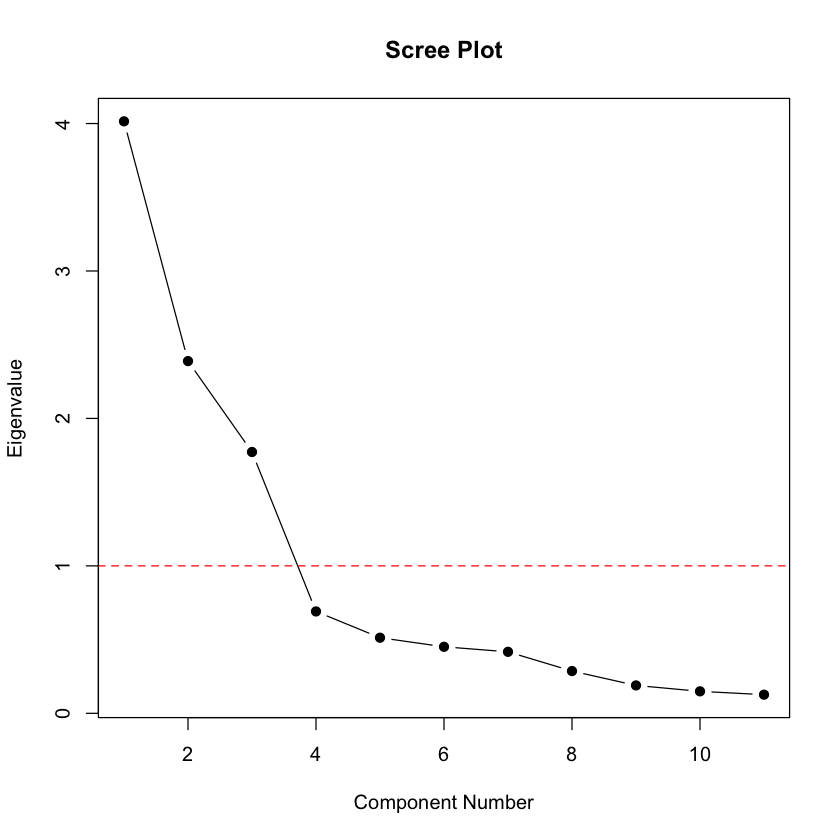

In [162]:
scree_plot <- function(data) {
  # Run PCA
  pca_results <- prcomp(data, scale. = TRUE)
  
  # Extract eigenvalues
  eigenvalues <- pca_results$sdev^2
  
  # Calculate variance explained
  var_explained <- eigenvalues / sum(eigenvalues) * 100
  
  # Create data frame for plotting
  plot_data <- data.frame(
    Component = 1:length(eigenvalues),
    Eigenvalue = eigenvalues,
    Variance = var_explained
  )
  
  # Plot scree plot
  plot(plot_data$Component, plot_data$Eigenvalue, 
       type = "b", pch = 19, 
       xlab = "Component Number", 
       ylab = "Eigenvalue",
       main = "Scree Plot")
  
  # Add horizontal line at eigenvalue = 1
  abline(h = 1, lty = 2, col = "red")
}

# Usage
par(bg='white')
items <- dat_online[, c("TT1", "TT2", "TT3", "HH1", "HH2", "HH3", "DV1", "DV2", "DV3", "DV4", "DV5")]
scree_plot(items)

## Regression

In [190]:
# Load the dataset
dat_reg <- read_sav("/Users/macbook/Library/CloudStorage/GoogleDrive-tranquangthanhcong@gmail.com/My Drive/study/ueh master/multivariate/data/HOIQUIBOI.sav")
head(dat_online,2)

TT1,TT2,TT3,HH1,HH2,HH3,DV1,DV2,DV3,DV4,...,Nghe,Thu_nhap,Hoc_van,ctieums,X1,X3,Y,X2,CD_DH,chitieuMH
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,...,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>
5,5,5,2,4,4,5,5,5,5,...,1,3,2,0.5,5.0,3.33,4.92,5,1,1
4,4,4,4,4,4,3,3,3,4,...,1,2,2,1.0,3.4,4.00,3.80,4,1,2


In [191]:
# convert value to factors (readable)
dat_fact_reg <- as_label(dat_reg) %>% as_factor()
head(dat_fact_reg,2)

sluong,dgia,cphiqc
<fct>,<fct>,<fct>
350,5.5,3.3
460,7.5,3.3


### Scatter plot

We can have a look on how the relationship variables is by plot a scatter chart. We can use a simple builtin function in R

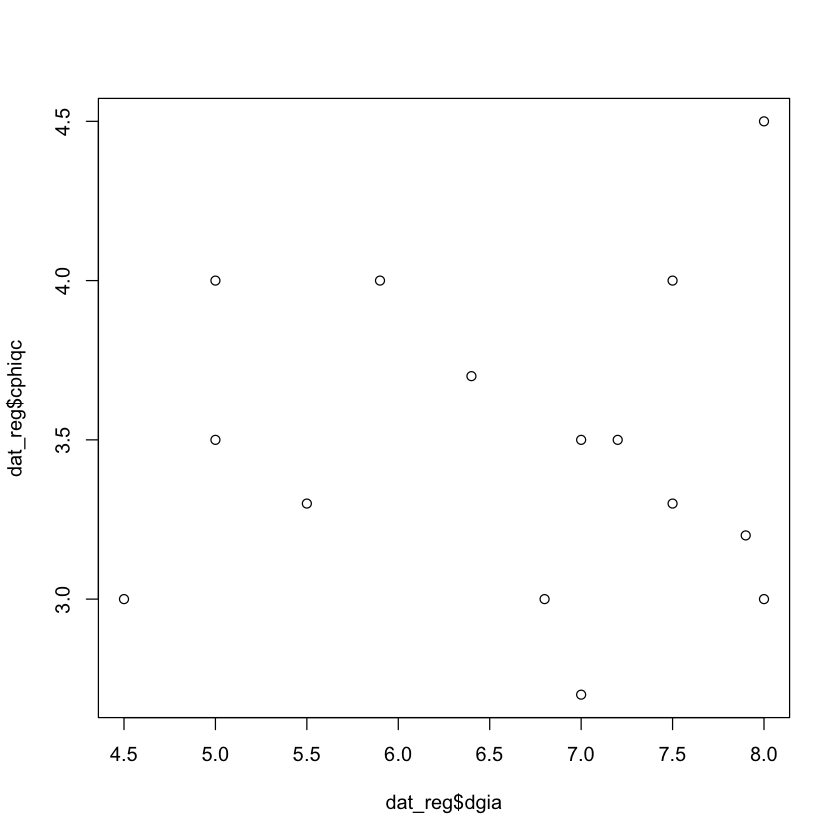

In [219]:
par(bg = 'white')
plot(dat_reg$dgia, dat_reg$cphiqc)

or we can use ggplot2 which more options to adjust

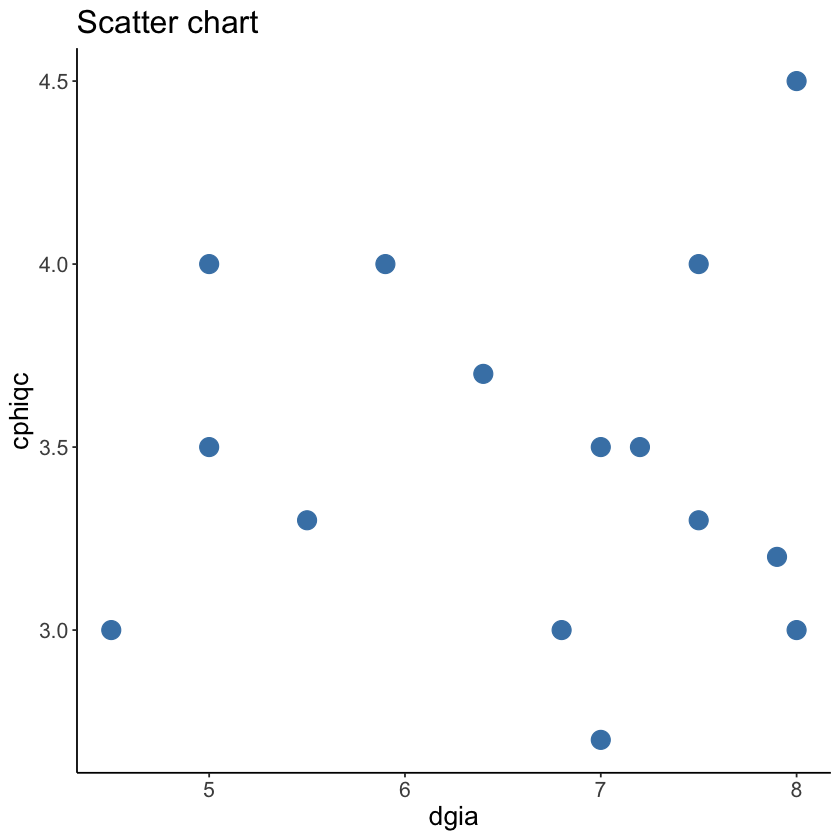

In [220]:
# plot scatter chart of dat_hoiquy for dgia and cphiquangcao
dat_reg %>%
  ggplot(aes(x = dgia, y = cphiqc)) +
  geom_point(size = 5, color = "steelblue") +
  labs(title = "Scatter chart")
  

### Linear model

In [225]:
# run linear regression with dependient is sluong and others is independent
model <- lm(sluong ~ dgia + cphiqc, data = dat_reg)
anova(model) %>% kable(format='pandoc')
summary(model) 
stargazer(model, type = "text", digits = 4)



             Df   Sum Sq   Mean Sq   F value   Pr(>F)
----------  ---  -------  --------  --------  -------
dgia          1    11100     11100      4.93    0.046
cphiqc        1    18360     18360      8.15    0.014
Residuals    12    27033      2253        NA       NA


Call:
lm(formula = sluong ~ dgia + cphiqc, data = dat_reg)

Residuals:
   Min     1Q Median     3Q    Max 
-63.80 -33.80  -9.09  17.18  96.15 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    306.5      114.3    2.68    0.020 *
dgia           -25.0       10.8   -2.31    0.040 *
cphiqc          74.1       26.0    2.85    0.014 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.5 on 12 degrees of freedom
Multiple R-squared:  0.521,	Adjusted R-squared:  0.442 
F-statistic: 6.54 on 2 and 12 DF,  p-value: 0.012



                        Dependent variable:    
                    ---------------------------
                              sluong           
-----------------------------------------------
dgia                        -25.0000**         
                             (10.8000)         
                                               
cphiqc                       74.1000**         
                             (26.0000)         
                                               
Constant                    307.0000**         
                            (114.0000)         
                                               
-----------------------------------------------
Observations                    15             
R2                            0.5210           
Adjusted R2                   0.4420           
Residual Std. Error      47.5000 (df = 12)     
F Statistic            6.5400** (df = 2; 12)   
Note:               *p<0.1; **p<0.05; ***p<0.01


In [227]:
# view model dubin watson
library(lmtest)
options(digits=10)
dwtest(model)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model
DW = 1.6831203, p-value = 0.3018732
alternative hypothesis: true autocorrelation is greater than 0


In [228]:
dat_reg$resid<-model$residuals
dat_reg$pred<-model$fitted.values

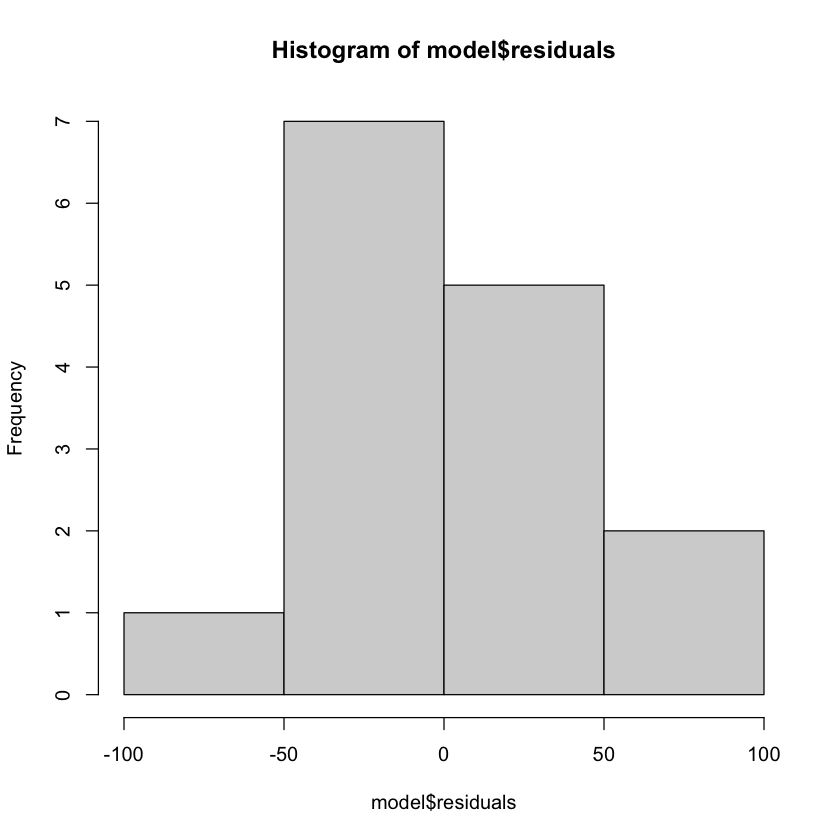

In [229]:
hist(model$residuals)

#### normalization

In [234]:
dat_reg$sluong_scale <- scale(dat_reg$sluong)
dat_reg$dgia_scale <- scale(dat_reg$dgia)
dat_reg$cphiqc_scale <- scale(dat_reg$cphiqc)
model <- lm(sluong_scale ~ dgia_scale + cphiqc_scale, data = dat_reg)
anova(model)
summary(model)
stargazer(model, type = "text", digits = 4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
dgia_scale,1,2.750875603,2.7508756035,4.927449645,0.04645635254
cphiqc_scale,1,4.549815501,4.5498155009,8.149763933,0.01449362680
Residuals,12,6.699308896,0.5582757413,NA,NA



Call:
lm(formula = sluong_scale ~ dgia_scale + cphiqc_scale, data = dat_reg)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.0042793 -0.5320155 -0.1430723  0.2703761  1.5136884 

Coefficients:
                  Estimate    Std. Error  t value Pr(>|t|)  
(Intercept)   3.905180e-16  1.929207e-01  0.00000 1.000000  
dgia_scale   -4.606330e-01  1.997844e-01 -2.30565 0.039788 *
cphiqc_scale  5.703404e-01  1.997844e-01  2.85478 0.014494 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7471785 on 12 degrees of freedom
Multiple R-squared:  0.5214779,	Adjusted R-squared:  0.4417243 
F-statistic: 6.538607 on 2 and 12 DF,  p-value: 0.01200637



                        Dependent variable:    
                    ---------------------------
                           sluong_scale        
-----------------------------------------------
dgia_scale                   -0.4606**         
                             (0.1998)          
                                               
cphiqc_scale                 0.5703**          
                             (0.1998)          
                                               
Constant                      0.0000           
                             (0.1929)          
                                               
-----------------------------------------------
Observations                    15             
R2                            0.5215           
Adjusted R2                   0.4417           
Residual Std. Error      0.7472 (df = 12)      
F Statistic            6.5386** (df = 2; 12)   
Note:               *p<0.1; **p<0.05; ***p<0.01


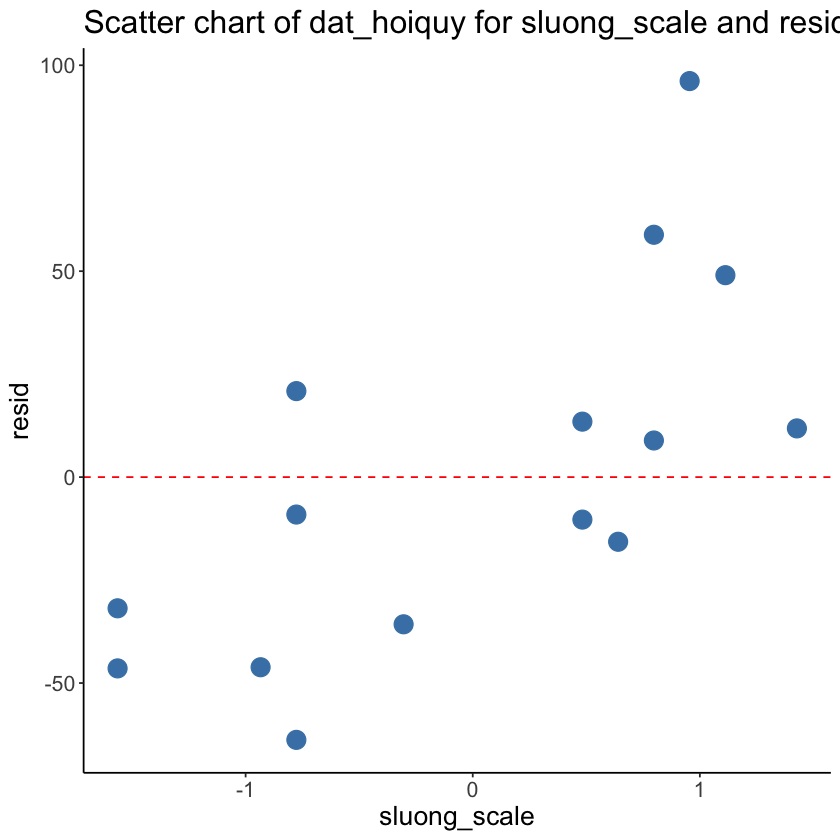

In [237]:
dat_reg %>%
  ggplot(aes(x = sluong_scale, y = resid)) +
  geom_point(size=5,color='steelblue') +
  geom_hline(yintercept = mean(model$residuals), linetype="dashed", color = "red") +
  labs(title = "Scatter chart of dat_hoiquy for sluong_scale and residuals")